# A. Import Library

Pada tahap ini, kita akan mengimpor semua pustaka Python yang diperlukan untuk pengembangan proyek ini.


In [1]:
# Import library untuk manipulasi data
import pandas as pd

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk pemodelan machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder , StandardScaler
import numpy as np



# B. Data Loading



**Pada tahap, kita akan mengimport dataset dari lokal**

Memuat dataset dari file CSV

In [2]:
file_path = '/content/TreeCoverLoss_2001-2020_ByRegion.csv'
df = pd.read_csv(file_path)

Menampilkan jumlah baris dan kolom dalam dataset

In [3]:
print(f"Dari tabel hasil di atas terdapat {df.shape[0]} baris dan {df.shape[1]} kolom pada dataset.")

Dari tabel hasil di atas terdapat 3967 baris dan 4 kolom pada dataset.


Menampilkan seluruh dataset

In [4]:
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom

# Menampilkan dataset
df

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AFG,2001,8.809271e+01,2.226891e+04
1,AGO,2001,1.012206e+05,3.687662e+07
2,AIA,2001,3.878461e+00,6.267003e+02
3,ALA,2001,3.969348e+02,7.589787e+04
4,ALB,2001,3.729021e+03,1.333223e+06
5,AND,2001,1.654213e+00,5.937031e+02
6,ARG,2001,1.478060e+05,3.160782e+07
7,ARM,2001,1.318406e+02,3.956520e+04
8,ATG,2001,2.407419e+01,6.749782e+03
9,AUS,2001,2.188163e+05,3.242429e+07


Menampilkan nama-nama kolom

In [5]:
print("Nama Kolom Dataset:")
print(df.columns)

Nama Kolom Dataset:
Index(['CountryCode', 'Year', 'TreeCoverLoss_ha',
       'GrossEmissions_Co2_all_gases_Mg'],
      dtype='object')


Memeriksa missing values dalam dataset

In [6]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
dtype: int64


Menampilkan statistik deskriptif dari dataset

In [7]:
df.describe()

,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
count,3967.000000,3.967000e+03,3.967000e+03
mean,2010.357701,1.036989e+05,4.160420e+07
std,5.749464,4.268489e+05,1.687227e+08
min,2001.000000,0.000000e+00,0.000000e+00
25%,2005.000000,8.356623e+01,2.899068e+04
50%,2010.000000,3.465502e+03,1.466946e+06
75%,2015.000000,3.834318e+04,1.677140e+07
max,2020.000000,5.560386e+06,3.306077e+09


# C. Exploratory Data Analysis

##Deskripsi Variabel

In [8]:
# Menampilkan deskripsi variabel untuk memahami jenis data dan informasi lainnya
print("Informasi Dataset:")
df.info()

# Menampilkan statistik deskriptif untuk melihat rentang nilai numerik
print("Deskripsi Statistik:")
print(df.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CountryCode                      3967 non-null   object 
 1   Year                             3967 non-null   int64  
 2   TreeCoverLoss_ha                 3967 non-null   float64
 3   GrossEmissions_Co2_all_gases_Mg  3967 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 124.1+ KB
Deskripsi Statistik:
              Year  TreeCoverLoss_ha  GrossEmissions_Co2_all_gases_Mg
count  3967.000000      3.967000e+03                     3.967000e+03
mean   2010.357701      1.036989e+05                     4.160420e+07
std       5.749464      4.268489e+05                     1.687227e+08
min    2001.000000      0.000000e+00                     0.000000e+00
25%    2005.000000      8.356623e+01                     2.899068e+0

##Menangani Missing Value

In [9]:
# Memeriksa missing values pada setiap kolom
print("Missing Values per Kolom:")
print(df.isnull().sum())

# Menangani missing values (misalnya dengan mengisi menggunakan median atau menghapus baris)
df['TreeCoverLoss_ha'] = df['TreeCoverLoss_ha'].fillna(df['TreeCoverLoss_ha'].median())
df['GrossEmissions_Co2_all_gases_Mg'] = df['GrossEmissions_Co2_all_gases_Mg'].fillna(df['GrossEmissions_Co2_all_gases_Mg'].median())

# Memastikan tidak ada missing values yang tersisa
print("Missing Values setelah Penanganan:")
print(df.isnull().sum())


Missing Values per Kolom:
CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
dtype: int64
Missing Values setelah Penanganan:
CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
dtype: int64


##Memeriksa Duplikasi Data

In [10]:
# Memeriksa apakah ada duplikasi dalam dataset
print("Jumlah Duplikasi Data:")
print(df.duplicated().sum())

# Menghapus duplikasi jika ada
df = df.drop_duplicates()

# Memastikan duplikasi telah dihapus
print("Jumlah Duplikasi Data setelah Dihapus:")
print(df.duplicated().sum())


Jumlah Duplikasi Data:
0
Jumlah Duplikasi Data setelah Dihapus:
0


##Univariate Analysis (Analisis Univariat)

### Analisis Univariat: Distribusi Kehilangan Tutupan Pohon (TreeCoverLoss_ha) per Tahun

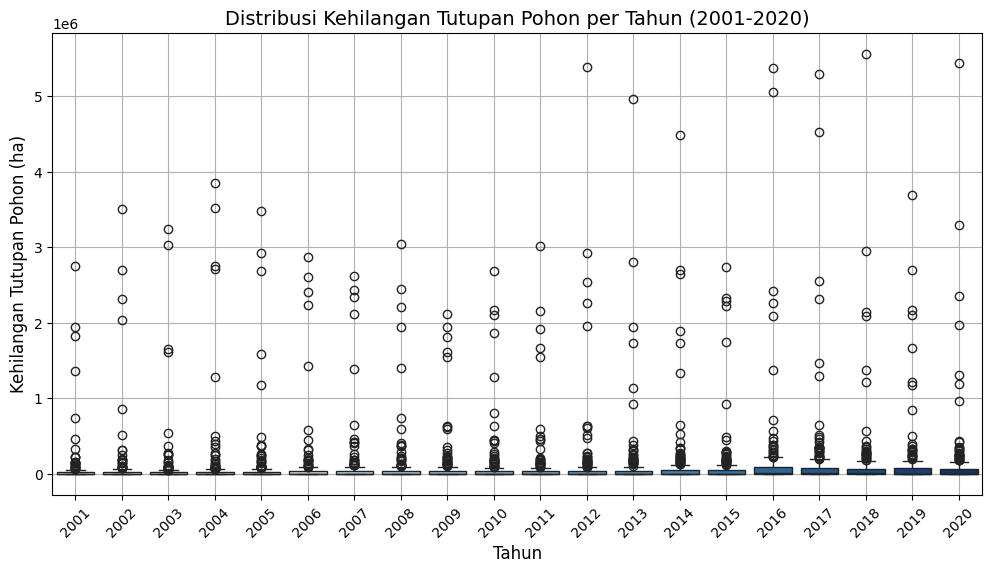

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='TreeCoverLoss_ha', data=df, hue='Year', palette='Blues', dodge=False)
plt.legend([],[], frameon=False)  # Hilangkan legend
plt.title('Distribusi Kehilangan Tutupan Pohon per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Menampilkan statistik deskriptif untuk 'TreeCoverLoss_ha'

In [12]:
print("\nStatistik Deskriptif untuk TreeCoverLoss_ha (2001-2020):")
print(df['TreeCoverLoss_ha'].describe())


Statistik Deskriptif untuk TreeCoverLoss_ha (2001-2020):
count    3.967000e+03
mean     1.036989e+05
std      4.268489e+05
min      0.000000e+00
25%      8.356623e+01
50%      3.465502e+03
75%      3.834318e+04
max      5.560386e+06
Name: TreeCoverLoss_ha, dtype: float64


### Analisis Univariat: Distribusi Emisi CO2 (GrossEmissions_Co2_all_gases_Mg) per Tahun

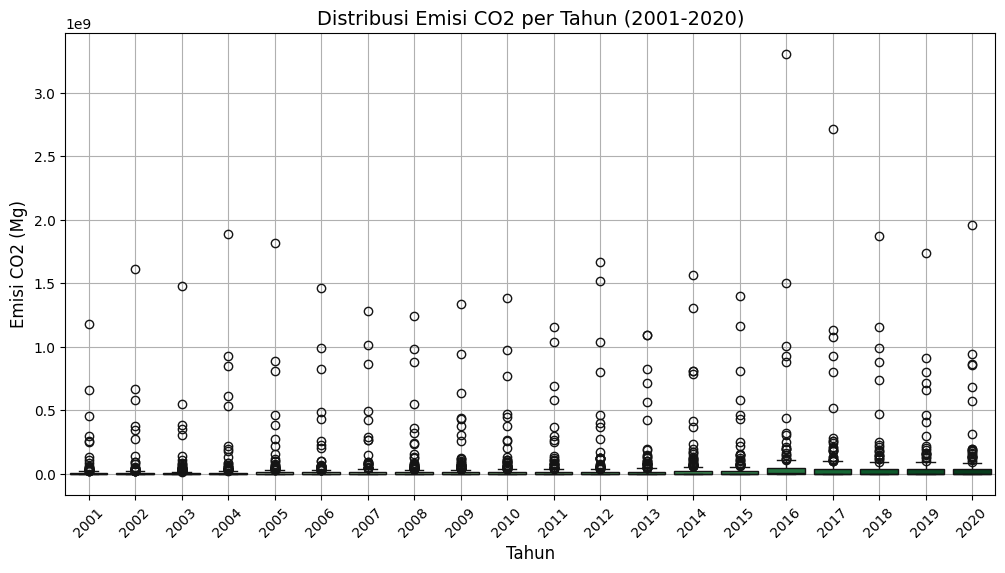

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='GrossEmissions_Co2_all_gases_Mg', data=df,
            hue='Year', palette='Greens', dodge=False)
plt.legend([],[], frameon=False)  # Hilangkan legend
plt.title('Distribusi Emisi CO2 per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Emisi CO2 (Mg)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Menampilkan statistik deskriptif untuk 'GrossEmissions_Co2_all_gases_Mg'

In [14]:
print("\nStatistik Deskriptif untuk GrossEmissions_Co2_all_gases_Mg (2001-2020):")
print(df['GrossEmissions_Co2_all_gases_Mg'].describe())


Statistik Deskriptif untuk GrossEmissions_Co2_all_gases_Mg (2001-2020):
count    3.967000e+03
mean     4.160420e+07
std      1.687227e+08
min      0.000000e+00
25%      2.899068e+04
50%      1.466946e+06
75%      1.677140e+07
max      3.306077e+09
Name: GrossEmissions_Co2_all_gases_Mg, dtype: float64


### Jika ingin melihat tren per tahun, bisa gunakan lineplot:


Tren Kehilangan Tutupan Pohon per Tahun

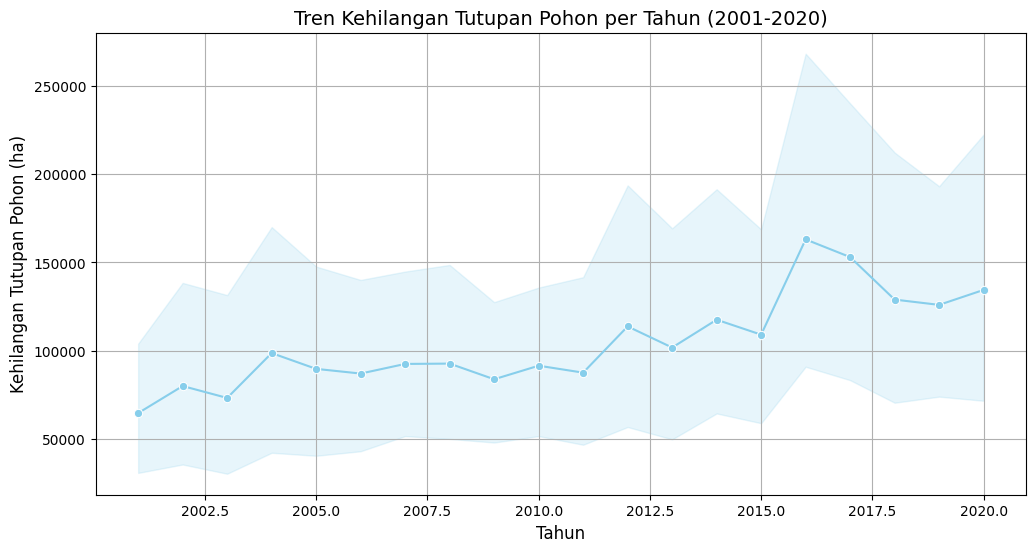

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='TreeCoverLoss_ha', data=df, marker='o', color='skyblue')
plt.title('Tren Kehilangan Tutupan Pohon per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.grid(True)
plt.show()

### Tren Emisi CO2 per Tahun

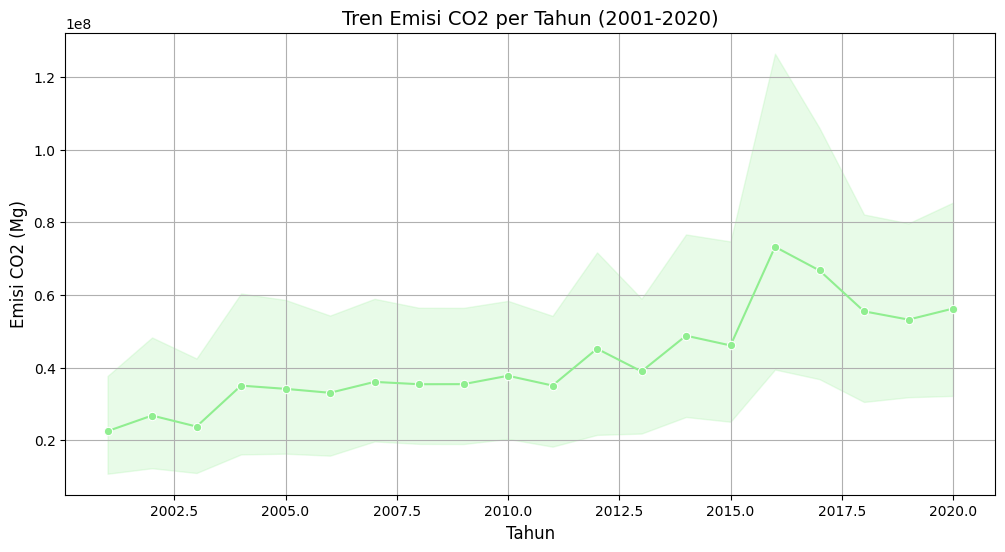

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GrossEmissions_Co2_all_gases_Mg', data=df, marker='o', color='lightgreen')
plt.title('Tren Emisi CO2 per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Emisi CO2 (Mg)', fontsize=12)
plt.grid(True)
plt.show()

##Multivariate Analysis (Analisis Multivariat)

### 1. Korelasi antar variabel numerik

In [17]:
correlation = df[['TreeCoverLoss_ha', 'GrossEmissions_Co2_all_gases_Mg', 'Year']].corr()

### Menampilkan matriks korelasi

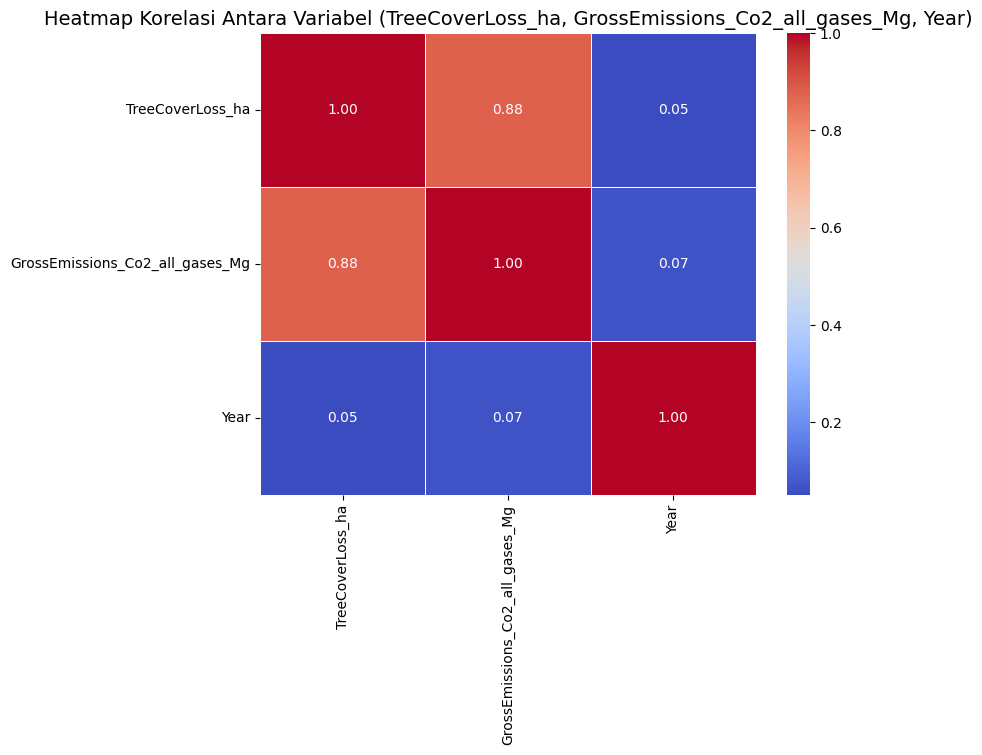

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antara Variabel (TreeCoverLoss_ha, GrossEmissions_Co2_all_gases_Mg, Year)', fontsize=14)
plt.show()

### 2. Visualisasi hubungan antara variabel TreeCoverLoss_ha dan GrossEmissions_Co2_all_gases_Mg

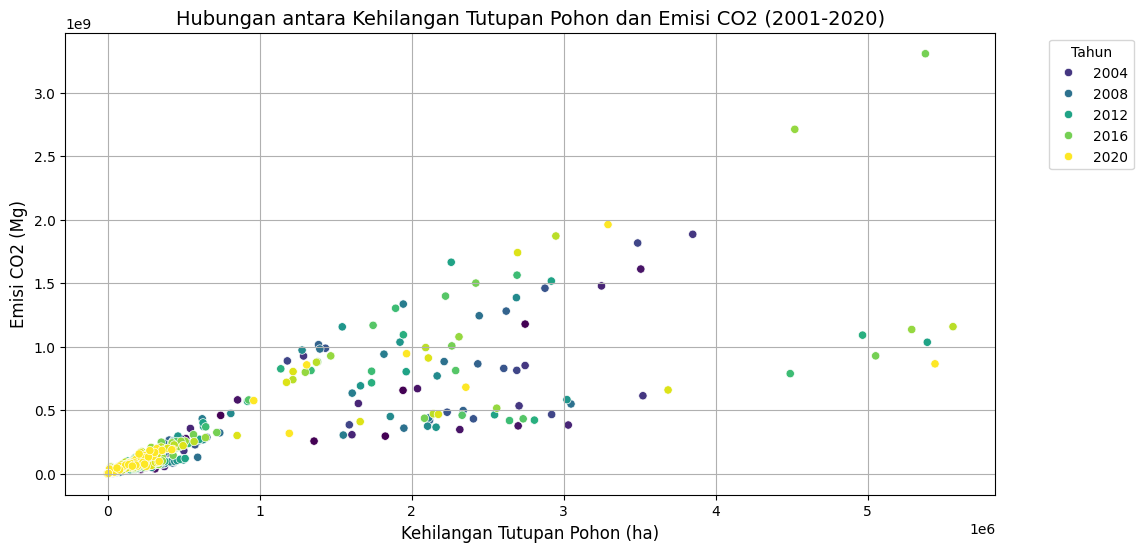

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TreeCoverLoss_ha', y='GrossEmissions_Co2_all_gases_Mg', data=df, hue='Year', palette='viridis')
plt.title('Hubungan antara Kehilangan Tutupan Pohon dan Emisi CO2 (2001-2020)', fontsize=14)
plt.xlabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.ylabel('Emisi CO2 (Mg)', fontsize=12)
plt.grid(True)
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3. Visualisasi hubungan antara variabel TreeCoverLoss_ha dan Year menggunakan lineplot

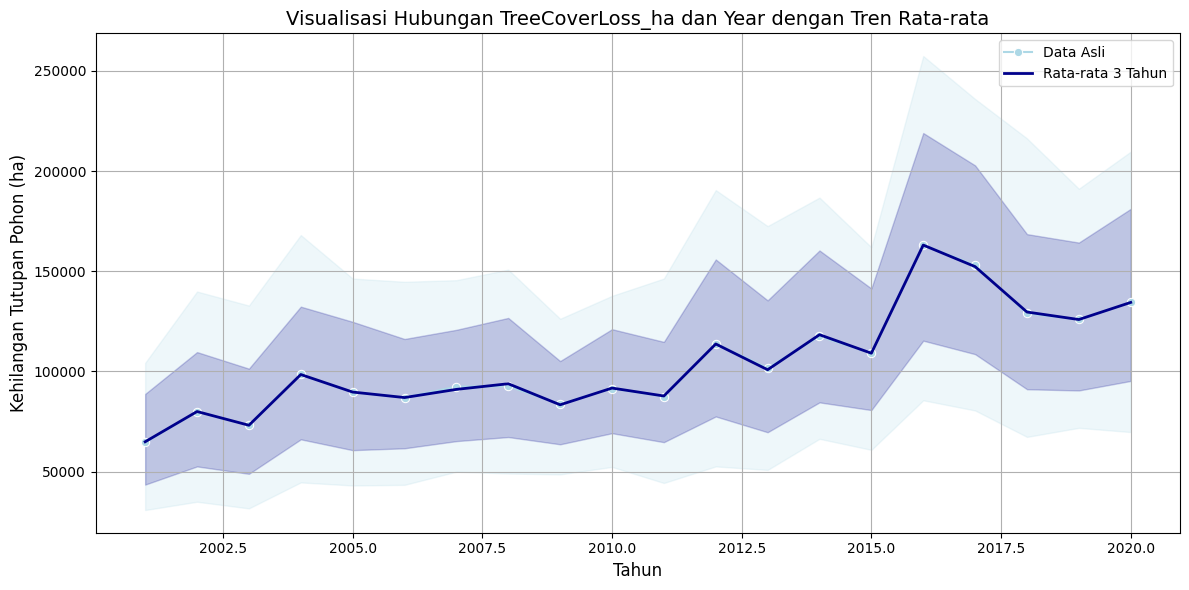

In [20]:
plt.figure(figsize=(12, 6))

# Urutkan berdasarkan tahun dan hitung moving average (misal 3 tahun)
df_sorted = df.sort_values('Year')
df_sorted['TreeCoverLoss_MA'] = df_sorted['TreeCoverLoss_ha'].rolling(window=3).mean()

# Lineplot data asli
sns.lineplot(x='Year', y='TreeCoverLoss_ha', data=df_sorted, label='Data Asli', color='lightblue', marker='o')

# Lineplot moving average
sns.lineplot(x='Year', y='TreeCoverLoss_MA', data=df_sorted, label='Rata-rata 3 Tahun', color='darkblue', linewidth=2)

plt.title('Visualisasi Hubungan TreeCoverLoss_ha dan Year dengan Tren Rata-rata', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 4. Visualisasi pairwise relationships antar variabel numerik

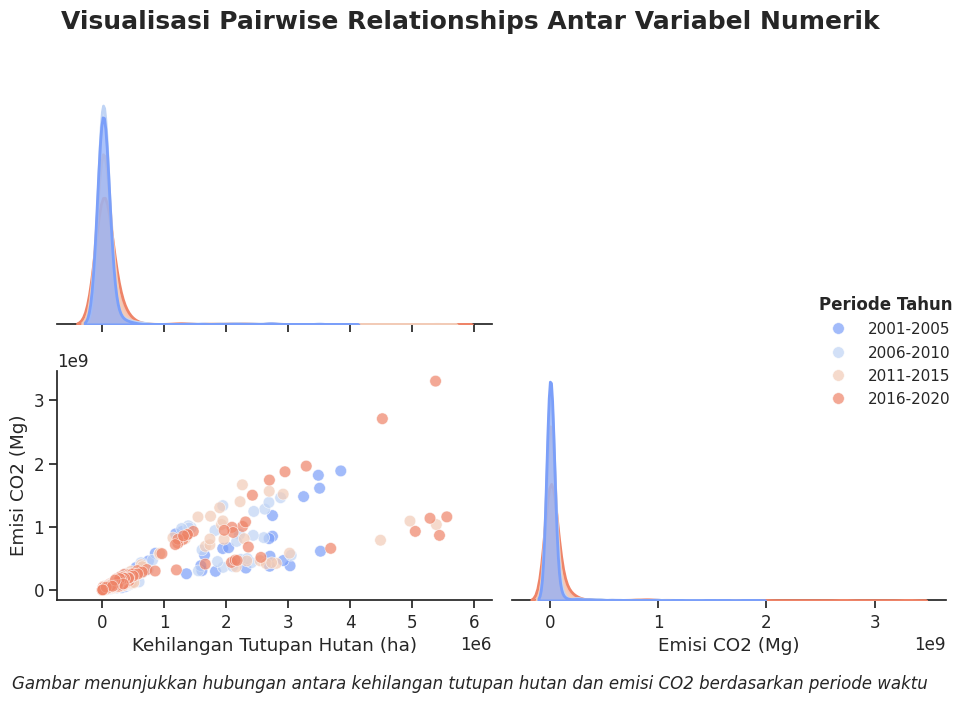

In [21]:
# Atur gaya visualisasi seaborn
sns.set_theme(style="ticks", font_scale=1.1)
plt.rcParams.update({'figure.figsize': (12, 10)})

# Kelompokkan tahun menjadi kategori periode
df['Periode'] = pd.cut(
    df['Year'],
    bins=[2000, 2005, 2010, 2015, 2020],
    labels=['2001-2005', '2006-2010', '2011-2015', '2016-2020'],
    include_lowest=True
)

# Siapkan kolom untuk visualisasi dengan nama yang lebih informatif
data_plot = df[['TreeCoverLoss_ha', 'GrossEmissions_Co2_all_gases_Mg', 'Periode']].copy()
data_plot.rename(columns={
    'TreeCoverLoss_ha': 'Kehilangan Tutupan Hutan (ha)',
    'GrossEmissions_Co2_all_gases_Mg': 'Emisi CO2 (Mg)'
}, inplace=True)

# Buat visualisasi pairwise relationships
pairplot = sns.pairplot(
    data_plot,
    hue='Periode',
    palette='coolwarm',   # Palette dengan kontras yang baik
    corner=True,          # Tampilkan setengah bawah diagonal
    diag_kind='kde',      # Tampilkan distribusi KDE pada diagonal
    height=3.5,           # Ukuran tiap subplot
    aspect=1.2,           # Rasio aspek subplot
    plot_kws={
        'alpha': 0.7,      # Transparansi titik
        's': 70,           # Ukuran titik
        'edgecolor': 'w',  # Warna garis tepi titik
        'linewidth': 0.5   # Ketebalan garis tepi titik
    },
    diag_kws={
        'linewidth': 2,    # Ketebalan garis KDE
        'fill': True,      # Mengganti 'shade' dengan 'fill' untuk menghindari warning
        'alpha': 0.5       # Transparansi area KDE
    }
)

# Atur judul dan styling
pairplot.fig.subplots_adjust(top=0.93)  # Beri ruang untuk judul
pairplot.fig.suptitle('Visualisasi Pairwise Relationships Antar Variabel Numerik',
                     fontsize=18, fontweight='bold')

# Tambahkan judul untuk legenda
pairplot._legend.set_title('Periode Tahun', prop={'size': 12, 'weight': 'bold'})
for text in pairplot._legend.get_texts():
    text.set_fontsize(11)

# Tambahkan anotasi penjelasan
plt.figtext(0.5, 0.01,
           'Gambar menunjukkan hubungan antara kehilangan tutupan hutan dan emisi CO2 berdasarkan periode waktu',
           ha='center', fontsize=12, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Atur layout dengan mempertimbangkan anotasi dan judul
plt.show()

#D. Data Preparation

 ## Mengatasi Missing Value

In [22]:
# Memeriksa apakah ada missing values setelah penanganan
print("Missing Values setelah Penanganan:")
print(df.isnull().sum())


Missing Values setelah Penanganan:
CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
Periode                            0
dtype: int64


## Feature Engineering

In [23]:
# Membuat fitur baru: rata-rata kehilangan tutupan pohon per tahun
df['avg_tree_cover_loss_per_year'] = df['TreeCoverLoss_ha'] / (2020 - df['Year'])

# Cek beberapa baris data
df[['TreeCoverLoss_ha', 'Year', 'avg_tree_cover_loss_per_year']].head()

,TreeCoverLoss_ha,Year,avg_tree_cover_loss_per_year
0,88.092712,2001,4.636459
1,101220.621500,2001,5327.401132
2,3.878461,2001,0.204130
3,396.934826,2001,20.891307
4,3729.021031,2001,196.264265


 ## Encoding Fitur Kategorikal

In [24]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Membuat salinan untuk menghindari chained assignment warning
df['CountryCode_encoded'] = label_encoder.fit_transform(df['CountryCode'])

# Menampilkan beberapa hasil
df[['CountryCode', 'CountryCode_encoded']].head()

,CountryCode,CountryCode_encoded
0,AFG,1
1,AGO,2
2,AIA,3
3,ALA,4
4,ALB,5


## Feature Scaling

In [25]:
# 1. Handling Infinite Values
df = df.replace([np.inf, -np.inf], np.nan)

# 2. Handling Missing Values (setelah operasi sebelumnya)
# Cara yang lebih aman tanpa chained assignment
median_value = df['avg_tree_cover_loss_per_year'].median()
df = df.assign(avg_tree_cover_loss_per_year=df['avg_tree_cover_loss_per_year'].fillna(median_value))

# 3. Feature Scaling dengan Proses yang Benar
# List fitur yang akan di-scale
features_to_scale = ['TreeCoverLoss_ha',
                    'GrossEmissions_Co2_all_gases_Mg',
                    'avg_tree_cover_loss_per_year']

# Pisahkan fitur yang akan di-scale
features = df[features_to_scale]

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform data
scaled_features = scaler.fit_transform(features)

# Konversi hasil scaling ke DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Gabungkan dengan kolom lain yang tidak di-scale
df_scaled = df.drop(features_to_scale, axis=1).join(scaled_features_df)

# 4. Verifikasi hasil
print("5 Data Pertama setelah Scaling:")
print(df_scaled[features_to_scale].head())

print("\nStatistik Deskriptif setelah Scaling:")
print(df_scaled[features_to_scale].describe().round(2))

5 Data Pertama setelah Scaling:
   TreeCoverLoss_ha  GrossEmissions_Co2_all_gases_Mg  \
0         -0.242765                        -0.246482   
1         -0.005807                        -0.028023   
2         -0.242962                        -0.246611   
3         -0.242041                        -0.246164   
4         -0.234234                        -0.238712   

   avg_tree_cover_loss_per_year  
0                     -0.157952  
1                     -0.117322  
2                     -0.157986  
3                     -0.157828  
4                     -0.156489  

Statistik Deskriptif setelah Scaling:
       TreeCoverLoss_ha  GrossEmissions_Co2_all_gases_Mg  \
count           3967.00                          3967.00   
mean               0.00                             0.00   
std                1.00                             1.00   
min               -0.24                            -0.25   
25%               -0.24                            -0.25   
50%               -0.23     

## Train-Test Split

In [26]:
# Menentukan variabel independen (X) dan dependen (y)
X = df[['TreeCoverLoss_ha', 'avg_tree_cover_loss_per_year']]  # Fitur
y = df['GrossEmissions_Co2_all_gases_Mg']  # Target: Prediksi emisi CO2

# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Menampilkan bentuk data
print(f"Data Train: {X_train.shape}")
print(f"Data Test : {X_test.shape}")


Data Train: (3173, 2)
Data Test : (794, 2)


#E. Model Development

Pada tahap ini, kita akan membuat dan melatih model machine learning menggunakan dataset yang sudah dipersiapkan. Karena permasalahan Anda termasuk dalam regresi (misalnya, memprediksi nilai emisi CO₂ berdasarkan kehilangan tutupan pohon), maka kita akan menggunakan model regresi seperti:

Linear Regression

Random Forest Regressor

XGBoost Regressor

##Model 1: Linear Regression

In [27]:
# Inisialisasi model
lr_model = LinearRegression()

# Latih model
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)


##Model 2: Random Forest Regressor

In [28]:
# Inisialisasi model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)


##Model 3: XGBoost Regressor

In [29]:
# Inisialisasi model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)


#F. Evaluasi Model

📐 Metrik yang Digunakan:





*   MAE (Mean Absolute Error) – rata-rata selisih absolut antara prediksi dan nilai aktual.
*   RMSE (Root Mean Squared Error) – penalti lebih besar untuk error besar
*   R² Score (Koefisien Determinasi) – seberapa baik prediksi model menjelaskan varians data aktual.






##Evaluasi Model Linear Regression

In [30]:
# Evaluasi
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print(f"MAE  : {mae_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R2   : {r2_lr:.4f}")

Linear Regression
MAE  : 20048150.3723
RMSE : 85785222.4055
R2   : 0.7428


##Evaluasi Model Random Forest

In [31]:
# Evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print(f"MAE  : {mae_rf:.4f}")
print(f"RMSE : {rmse_rf:.4f}")
print(f"R2   : {r2_rf:.4f}")

Random Forest
MAE  : 16088917.4141
RMSE : 81385115.6208
R2   : 0.7685


##Evaluasi Model XGBoost

In [32]:
# Evaluasi
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost")
print(f"MAE  : {mae_xgb:.4f}")
print(f"RMSE : {rmse_xgb:.4f}")
print(f"R2   : {r2_xgb:.4f}")


XGBoost
MAE  : 17472013.1603
RMSE : 93270812.1925
R2   : 0.6959


#Data dan fungsi cetak ringkasan

In [40]:
# Cell 1: Definisi data dan fungsi cetak ringkasan
evaluation_results = {
    'Linear Regression': {'MAE': 20048150.3723, 'RMSE': 85785222.4055, 'R2': 0.7428},
    'Random Forest': {'MAE': 16088917.4141, 'RMSE': 81385115.6208, 'R2': 0.7685},
    'XGBoost': {'MAE': 17472013.1603, 'RMSE': 93270812.1925, 'R2': 0.6959}
}

def print_evaluation_summary(results: dict) -> None:
    for model, metrics in results.items():
        print(f"{model}")
        print(f"MAE  : {metrics['MAE']:,.4f}")
        print(f"RMSE : {metrics['RMSE']:,.4f}")
        print(f"R2   : {metrics['R2']:.4f}")
        print('-' * 30)


#Fungsi plot bar chart

In [41]:
def plot_bar_chart(metrics: dict, metric_name: str, colors: list, use_log_scale=False) -> None:
    models = list(metrics.keys())
    values = [metrics[model][metric_name] for model in models]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, values, color=colors)
    plt.title(f'Perbandingan {metric_name} Antarmodel')

    ylabel = metric_name
    if metric_name == 'R2':
        plt.ylim(0, 1)
        ylabel = 'R² Score'
    plt.ylabel(ylabel)
    plt.grid(axis='y')

    if use_log_scale:
        plt.yscale('log')

    for bar, val in zip(bars, values):
        yval = bar.get_height()
        if metric_name == 'R2':
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{val:.3f}", ha='center', va='bottom')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{val:,.0f}", ha='center', va='bottom')

    plt.show()

#Cetak ringkasan evaluasi model

In [42]:
# Cell 3: Cetak ringkasan evaluasi model
print_evaluation_summary(evaluation_results)

Linear Regression
MAE  : 20,048,150.3723
RMSE : 85,785,222.4055
R2   : 0.7428
------------------------------
Random Forest
MAE  : 16,088,917.4141
RMSE : 81,385,115.6208
R2   : 0.7685
------------------------------
XGBoost
MAE  : 17,472,013.1603
RMSE : 93,270,812.1925
R2   : 0.6959
------------------------------


#Plot R² Score

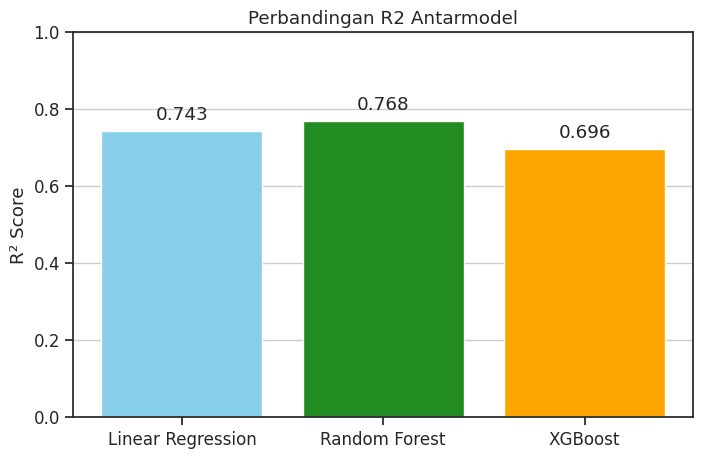

In [43]:
# Cell 4: Plot R² Score (linear scale 0-1)
colors = ['skyblue', 'forestgreen', 'orange']
plot_bar_chart(evaluation_results, 'R2', colors)

#Plot MAE

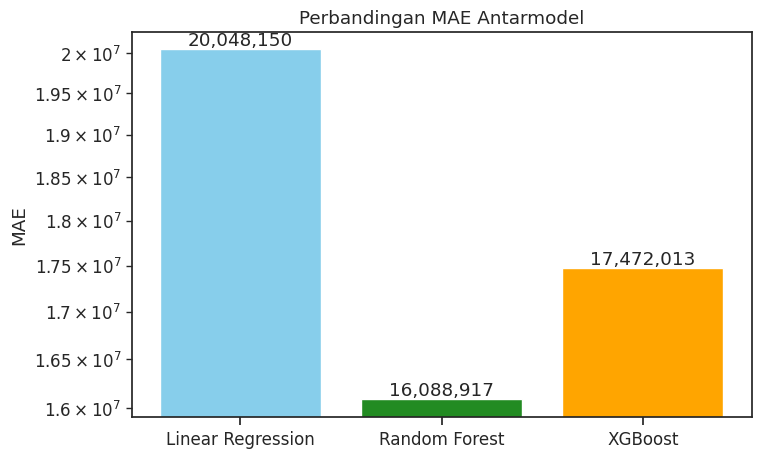

In [44]:
# Cell 5: Plot MAE (log scale)
plot_bar_chart(evaluation_results, 'MAE', colors, use_log_scale=True)


#Plot RMSE

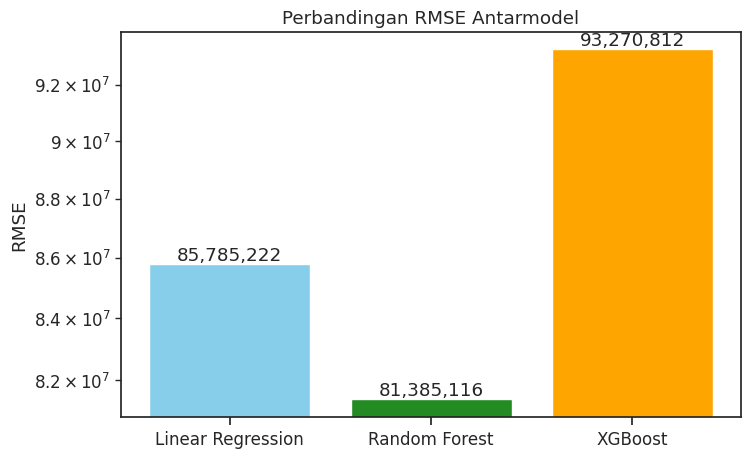

In [45]:
# Cell 6: Plot RMSE (log scale)
plot_bar_chart(evaluation_results, 'RMSE', colors, use_log_scale=True)